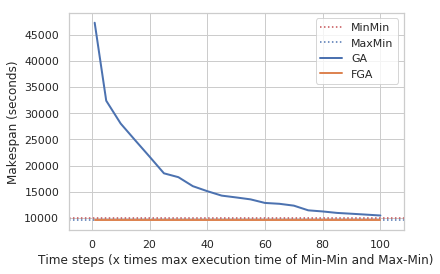

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
setting = 'Medium Machine Heterogeneity/1000'

file = open(rootAddress + setting + '/experimentOutput.txt')

ga_x_values = []
ga_y_values = []

fga_x_values = []
fga_y_values = []

line = file.readline()

while(line):
    
    values = line.split(',')
    
    if values[0] == 'MinMin':
        min_min = float(values[1])
        
    elif values[0] == 'MaxMin':
        max_min = float(values[1])
        
    elif values[0].startswith('GA-'):
        
        dashIndex = int(values[0].index('-')) + 1
        xIndex = int(values[0].index('x'))
        
        ga_x_values.append(float(values[0][dashIndex:xIndex]))
        ga_y_values.append(float(values[1]))
        
    elif values[0].startswith('FGA-'):
        
        dashIndex = int(values[0].index('-')) + 1
        xIndex = int(values[0].index('x'))
        
        fga_x_values.append(float(values[0][dashIndex:xIndex]))
        fga_y_values.append(float(values[1]))
    
    line = file.readline()

file.close()

plt.axhline(y=min_min, color='r', linestyle=':', label='MinMin')
plt.axhline(y=max_min, color='b', linestyle=':', label='MaxMin')

plt.plot(ga_x_values, ga_y_values, linewidth=2, label='GA')
plt.plot(fga_x_values, fga_y_values, linewidth=2, label='FGA')

plt.xlabel('Time steps (x times max execution time of Min-Min and Max-Min)')
plt.ylabel('Makespan (seconds)')
plt.legend()

plt.xlim(-8,108)

figure_name = '/' + setting.replace('/',' - ') + '.png'

plt.savefig(rootAddress + setting + figure_name, dpi=300, bbox_inches='tight')
plt.show()

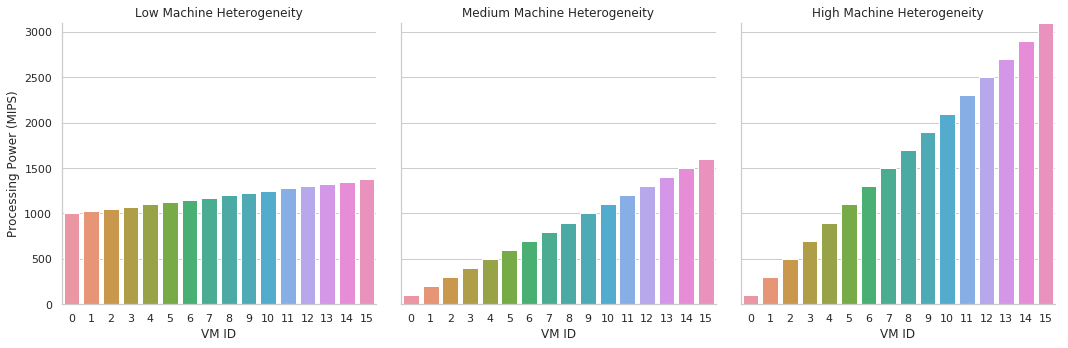

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
setting = 'Low Machine Heterogeneity'


file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()

spec_list = []

for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([setting, i, int(spec[1])])
    
    
setting = 'Medium Machine Heterogeneity'

file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()

for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([setting, i, int(spec[1])])

    
setting = 'High Machine Heterogeneity'

file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()


for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([setting, i, int(spec[1])])
    
data = pd.DataFrame(np.array(spec_list), columns=['Setting', 'VM ID', 'Processing Power (MIPS)'])
data = data.astype( dtype={'Setting' : str, 'VM ID': int, 'Processing Power (MIPS)': int})

sns.set(style="whitegrid")
g = sns.catplot(x="VM ID", y="Processing Power (MIPS)",
                hue="VM ID", col="Setting", data=data, kind="bar", dodge=False)

for ax, title in zip(g.axes.flat, ['Low Machine Heterogeneity', 'Medium Machine Heterogeneity', 'High Machine Heterogeneity']):
    ax.set_title(title)

plt.ylim(0,3100)

figure_name = '/VmSpecifications.png'

plt.savefig(rootAddress + figure_name, dpi=300)
plt.show()

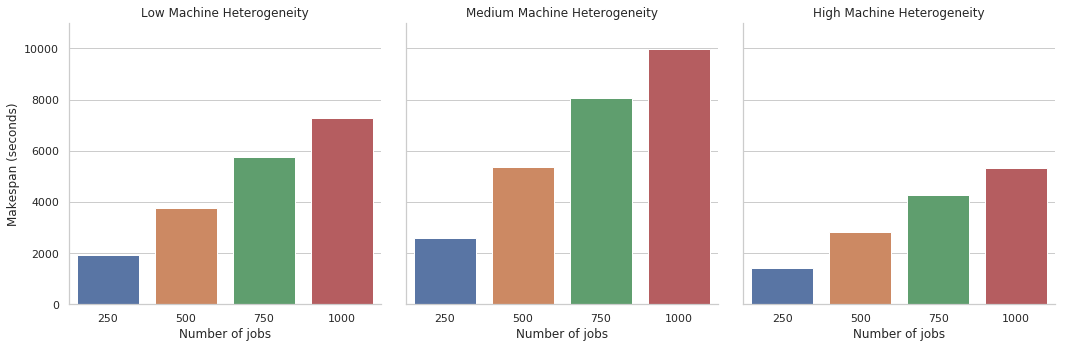

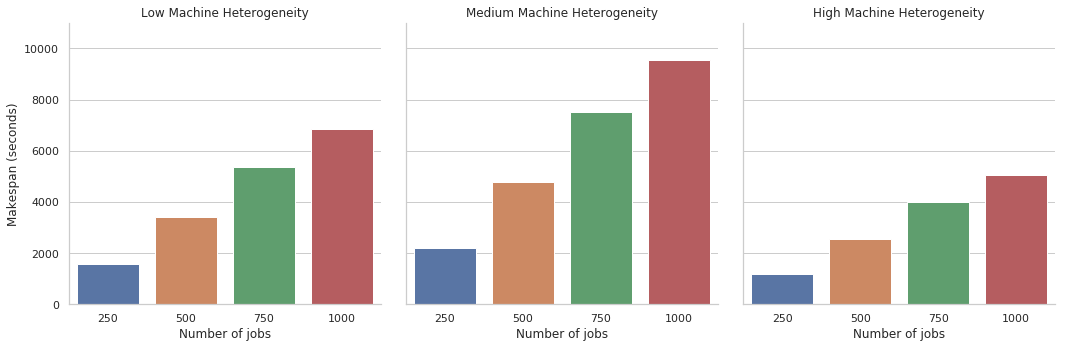

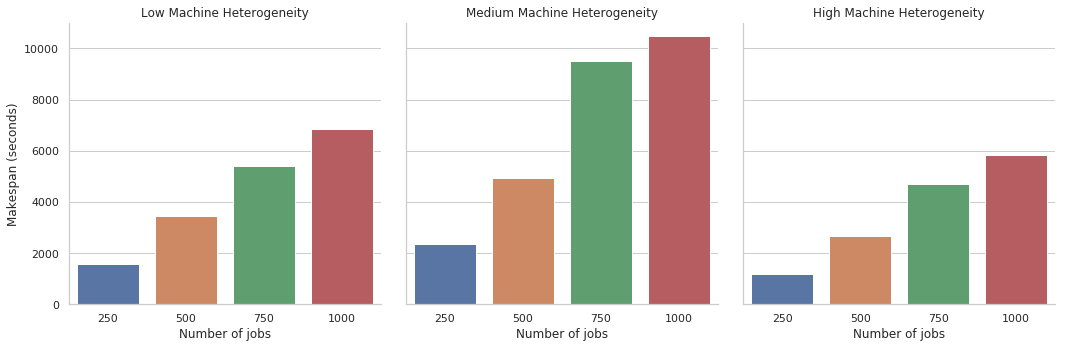

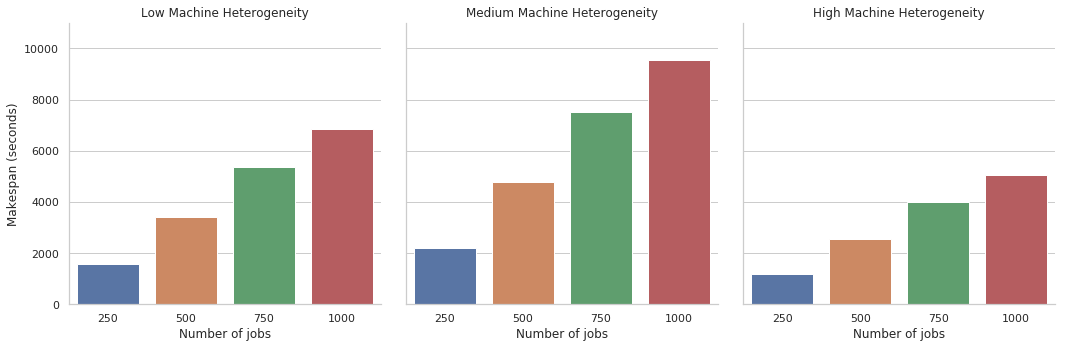

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
settings = ['Low Machine Heterogeneity', 'Medium Machine Heterogeneity', 'High Machine Heterogeneity']
no_jobs = ['250', '500', '750', '1000']
algorithms = ['MinMin', 'MaxMin', 'GA-100x', 'FGA-100x']

for algorithm in algorithms:
    results = []
    
    for setting in settings:
        for no_job in no_jobs:

                file = open(rootAddress + setting + '/' + no_job + '/experimentOutput.txt')

                line = file.readline()

                while(line):

                    values = line.split(',')

                    if values[0] == algorithm:
                        makespan = float(values[1])
                        throughput = float(values[2])
                        results.append([setting, no_job, algorithm, makespan, throughput])

                    line = file.readline()

                file.close()

    data = pd.DataFrame(np.array(results), columns=['Setting', 'Number of jobs', 'Algorithm', 'Makespan (seconds)', 'Throughput'])
    data = data.astype( dtype={'Setting' : str, 'Number of jobs': int, 'Algorithm': str, 'Makespan (seconds)':float, 'Throughput':float})

    sns.set(style="whitegrid")
    g = sns.catplot(x="Number of jobs", y="Makespan (seconds)", col="Setting", data=data, kind="bar", dodge=False)

    for ax, title in zip(g.axes.flat, ['Low Machine Heterogeneity', 'Medium Machine Heterogeneity', 'High Machine Heterogeneity']):
        ax.set_title(title)

    plt.ylim(0,11000)

    figure_name = '/' + algorithm + '_Makespan.png'
    
    plt.savefig(rootAddress + figure_name, dpi=300)


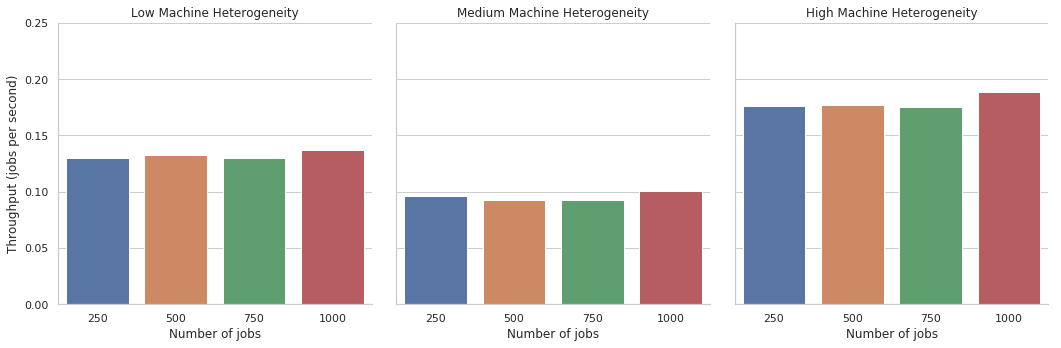

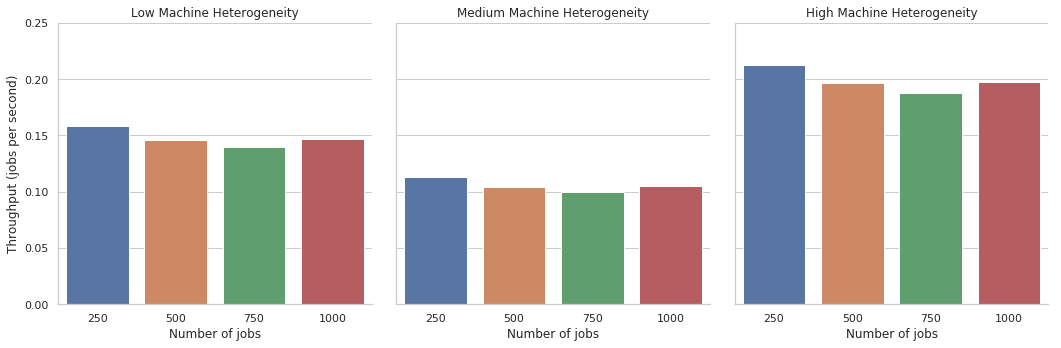

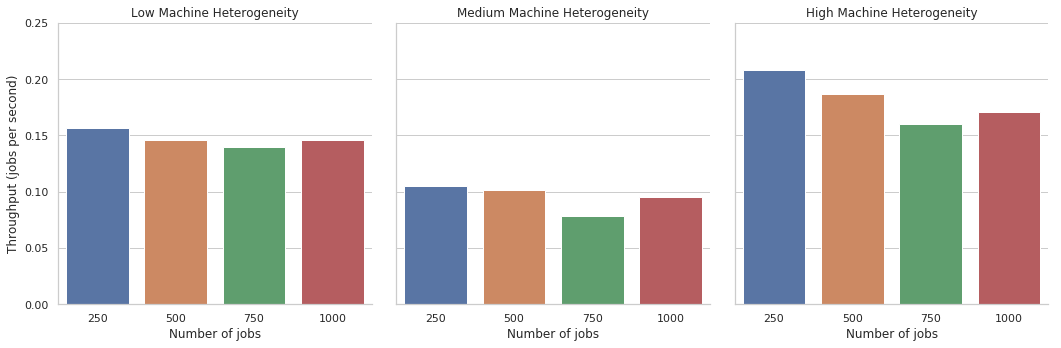

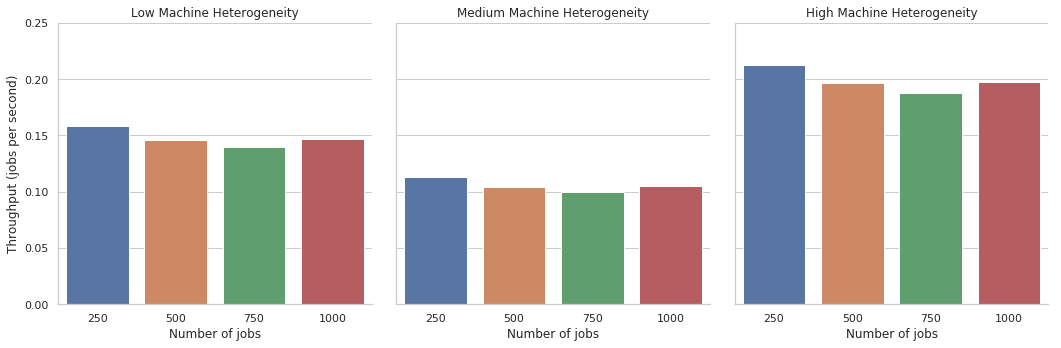

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
settings = ['Low Machine Heterogeneity', 'Medium Machine Heterogeneity', 'High Machine Heterogeneity']
no_jobs = ['250', '500', '750', '1000']
algorithms = ['MinMin', 'MaxMin', 'GA-100x', 'FGA-100x']

for algorithm in algorithms:
    results = []
    
    for setting in settings:
        for no_job in no_jobs:


                file = open(rootAddress + setting + '/' + no_job + '/experimentOutput.txt')

                line = file.readline()

                while(line):

                    values = line.split(',')

                    if values[0] == algorithm:
                        makespan = float(values[1])
                        throughput = float(values[2])
                        results.append([setting, no_job, algorithm, makespan, throughput])

                    line = file.readline()

                file.close()

    
    data = pd.DataFrame(np.array(results), columns=['Setting', 'Number of jobs', 'Algorithm', 'Makespan', 'Throughput (jobs per second)'])
    data = data.astype( dtype={'Setting' : str, 'Number of jobs': int, 'Algorithm': str, 'Makespan':float, 'Throughput (jobs per second)':float})

    sns.set(style="whitegrid")
    g = sns.catplot(x="Number of jobs", y="Throughput (jobs per second)", col="Setting", data=data, kind="bar", dodge=False)

    for ax, title in zip(g.axes.flat, ['Low Machine Heterogeneity', 'Medium Machine Heterogeneity', 'High Machine Heterogeneity']):
        ax.set_title(title)

    plt.ylim(0,0.250)

    figure_name = '/' + algorithm + '_Throughput.png'
    plt.savefig(rootAddress + figure_name, dpi=300)